## POS Tagging - Lexicon and Rule Based Taggers

Let's look at the two most basic tagging techniques - lexicon based (or unigram) and rule-based. 

In this guided exercise, you will explore the WSJ (wall street journal) POS-tagged corpus that comes with NLTK and build a lexicon and rule-based tagger using this corpus as the tarining data. 

This exercise is divided into the following sections:
1. Reading and understanding the tagged dataset
2. Exploratory analysis

### 1. Reading and understanding the tagged dataset

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math

In [2]:
nltk.corpus.treebank.tagged_sents()

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

In [3]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents())

In [7]:
# samples: Each sentence is a list of (word, pos) tuples
wsj[:3]

[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')],
 [('Rudolph', 'NNP'),
  ('Agnew', 'NNP'),
  (',', ','),
  ('55', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  ('and', 'CC'),
  ('former', 'JJ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Consolidated', 'NNP'),
  ('Gold', 'NNP'),
  ('Fields', 'NNP'),
  ('PLC', 'NNP'),
  (',', ','),
  ('was', 'VBD'),
  ('named', 'VBN'),
  ('*-1', '-NONE-'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('of', 'IN'),
  ('this'

In the list mentioned above, each element of the list is a sentence. Also, note that each sentence ends with a full stop '.' whose POS tag is also a '.'. Thus, the POS tag '.' demarcates the end of a sentence.

Also, we do not need the corpus to be segmented into sentences, but can rather use a list of (word, tag) tuples. Let's convert the list into a (word, tag) tuple.

In [5]:
# converting the list of sents to a list of (word, pos tag) tuples
tagged_words = [tup for sent in wsj for tup in sent]
print(len(tagged_words))
tagged_words[:10]

100676


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

We now have a list of about 100676 (word, tag) tuples. Let's now do some exploratory analyses.

### 2. Exploratory Analysis

Let's now conduct some basic exploratory analysis to understand the tagged corpus. To start with, let's ask some simple questions:
1. How many unique tags are there in the corpus? 
2. Which is the most frequent tag in the corpus?
3. Which tag is most commonly assigned to the following words:
    - "bank"
    - "executive"


In [13]:
len(set([word[0] for word in tagged_words]))

12408

In [ ]:
tagged_words

In [18]:
# question 1: Find the number of unique POS tags in the corpus
# you can use the set() function on the list of tags to get a unique set of tags, 
# and compute its length
unique_set = set([word[1] for word in tagged_words])
len(unique_set)

46

In [25]:
Counter([word[1] for word in tagged_words])

Counter({'NNP': 9410,
         ',': 4886,
         'CD': 3546,
         'NNS': 6047,
         'JJ': 5834,
         'MD': 927,
         'VB': 2554,
         'DT': 8165,
         'NN': 13166,
         'IN': 9857,
         '.': 3874,
         'VBZ': 2125,
         'VBG': 1460,
         'CC': 2265,
         'VBD': 3043,
         'VBN': 2134,
         '-NONE-': 6592,
         'RB': 2822,
         'TO': 2179,
         'PRP': 1716,
         'RBR': 136,
         'WDT': 445,
         'VBP': 1321,
         'RP': 216,
         'PRP$': 766,
         'JJS': 182,
         'POS': 824,
         '``': 712,
         'EX': 88,
         "''": 694,
         'WP': 241,
         ':': 563,
         'JJR': 381,
         'WRB': 178,
         '$': 724,
         'NNPS': 244,
         'WP$': 14,
         '-LRB-': 120,
         '-RRB-': 126,
         'PDT': 27,
         'RBS': 35,
         'FW': 4,
         'UH': 3,
         'SYM': 1,
         'LS': 13,
         '#': 16})

In [26]:
# question 2: Which is the most frequent tag in the corpus
# to count the frequency of elements in a list, the Counter() class from collections
# module is very useful, as shown below

from collections import Counter
tag_counts = Counter([word[1] for word in tagged_words])
tag_counts.most_common(1)

[('NN', 13166)]

In [27]:
# the most common tags can be seen using the most_common() method of Counter
tag_counts.most_common(5)

[('NN', 13166), ('IN', 9857), ('NNP', 9410), ('DT', 8165), ('-NONE-', 6592)]

In [28]:
tag_counts

Counter({'NNP': 9410,
         ',': 4886,
         'CD': 3546,
         'NNS': 6047,
         'JJ': 5834,
         'MD': 927,
         'VB': 2554,
         'DT': 8165,
         'NN': 13166,
         'IN': 9857,
         '.': 3874,
         'VBZ': 2125,
         'VBG': 1460,
         'CC': 2265,
         'VBD': 3043,
         'VBN': 2134,
         '-NONE-': 6592,
         'RB': 2822,
         'TO': 2179,
         'PRP': 1716,
         'RBR': 136,
         'WDT': 445,
         'VBP': 1321,
         'RP': 216,
         'PRP$': 766,
         'JJS': 182,
         'POS': 824,
         '``': 712,
         'EX': 88,
         "''": 694,
         'WP': 241,
         ':': 563,
         'JJR': 381,
         'WRB': 178,
         '$': 724,
         'NNPS': 244,
         'WP$': 14,
         '-LRB-': 120,
         '-RRB-': 126,
         'PDT': 27,
         'RBS': 35,
         'FW': 4,
         'UH': 3,
         'SYM': 1,
         'LS': 13,
         '#': 16})

Thus, NN is the most common tag followed by IN, NNP, DT, -NONE- etc. You can read the exhaustive list of tags using the NLTK documentation as shown below.

In [29]:
# list of POS tags in NLTK
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [30]:
# question 3: Which tag is most commonly assigned to the word w. Get the tags list that appear for word w and then use the Counter()
# Try 
w ='bank' 
bank = Counter([word[1] for word in tagged_words if word[0] == w])
bank

Counter({'NN': 38})

In [31]:
# question 3: Which tag is most commonly assigned to the word w. Try 'executive' 
executive = Counter([word[1] for word in tagged_words if word[0] == 'executive'])
executive

Counter({'NN': 40, 'JJ': 28})

### 2. Exploratory Analysis Contd.

Until now, we were looking at the frequency of tags assigned to particular words, which is the basic idea used by lexicon or unigram taggers. Let's now try observing some rules which can potentially be used for POS tagging. 

To start with, let's see if the following questions reveal something useful:

4. What fraction of words with the tag 'VBD' (verb, past tense) end with the letters 'ed'
5. What fraction of words with the tag 'VBG' (verb, present participle/gerund) end with the letters 'ing'

In [33]:
# 4. how many words with the tag 'VBD' (verb, past tense) end with 'ed'
# first get the all the words tagged as VBD
past_tense_verbs = [word for word in tagged_words if word[1] =='VBD']

# subset the past tense verbs with words ending with 'ed'. (Try w.endswith('ed'))
ed_verbs = [word for word in past_tense_verbs if word[0].endswith('ed') ]
print(len(ed_verbs) / len(past_tense_verbs))
ed_verbs[:20]

0.3881038448899113


[('reported', 'VBD'),
 ('stopped', 'VBD'),
 ('studied', 'VBD'),
 ('led', 'VBD'),
 ('worked', 'VBD'),
 ('explained', 'VBD'),
 ('imposed', 'VBD'),
 ('dumped', 'VBD'),
 ('poured', 'VBD'),
 ('mixed', 'VBD'),
 ('described', 'VBD'),
 ('ventilated', 'VBD'),
 ('contracted', 'VBD'),
 ('continued', 'VBD'),
 ('eased', 'VBD'),
 ('ended', 'VBD'),
 ('lengthened', 'VBD'),
 ('reached', 'VBD'),
 ('resigned', 'VBD'),
 ('approved', 'VBD')]

In [34]:
# 5. how many words with the tag 'VBG' end with 'ing'
participle_verbs = [ word for word in tagged_words if word[1] =='VBG']
ing_verbs = [w for w in participle_verbs if w[0].endswith('ing')]
print(len(ing_verbs) / len(participle_verbs))
ing_verbs[:20]

0.9972602739726028


[('publishing', 'VBG'),
 ('causing', 'VBG'),
 ('using', 'VBG'),
 ('talking', 'VBG'),
 ('having', 'VBG'),
 ('making', 'VBG'),
 ('surviving', 'VBG'),
 ('including', 'VBG'),
 ('including', 'VBG'),
 ('according', 'VBG'),
 ('remaining', 'VBG'),
 ('according', 'VBG'),
 ('declining', 'VBG'),
 ('rising', 'VBG'),
 ('yielding', 'VBG'),
 ('waiving', 'VBG'),
 ('holding', 'VBG'),
 ('holding', 'VBG'),
 ('cutting', 'VBG'),
 ('manufacturing', 'VBG')]

## 2. Exploratory Analysis Continued

Let's now try observing some tag patterns using the fact the some tags are more likely to apper after certain other tags. For e.g. most nouns NN are usually followed by determiners DT ("The/DT constitution/NN"), adjectives JJ usually precede a noun NN (" A large/JJ building/NN"), etc. 

Try answering the following questions:
1. What fraction of adjectives JJ are followed by a noun NN? 
2. What fraction of determiners DT are followed by a noun NN?
3. What fraction of modals MD are followed by a verb VB?

In [36]:
# question: what fraction of adjectives JJ are followed by a noun NN

# create a list of all tags (without the words)
tags = [ word[1] for word in tagged_words]

# create a list of JJ tags
jj_tags = [ word[1] for word in tagged_words if word[1] == 'JJ']

# create a list of (JJ, NN) tags
jj_nn_tags = [(tags[index], tags[index+1]) for index, t in enumerate(tags) 
              if tags[index] == 'JJ' and tags[index+1] == 'NN']

print(len(jj_tags))
print(len(jj_nn_tags))
print(len(jj_nn_tags) / len(jj_tags))

5834
2611
0.4475488515598217


In [39]:
# question: what fraction of determiners DT are followed by a noun NN
dt_tags = [word[1] for word in tagged_words if word[1] == 'DT']
dt_nn_tags = [(tags[index], tags[index+1]) for index, t in enumerate(tags) 
              if tags[index] == 'DT' and tags[index+1] == 'NN']

print(len(dt_tags))
print(len(dt_nn_tags))
print(len(dt_nn_tags) / len(dt_tags))

8165
3844
0.470789957134109


In [42]:
# question: what fraction of modals MD are followed by a verb VB?
md_tags = [word[1] for word in tagged_words if word[1] == 'MD']
md_vb_tags = [(tags[index], tags[index+1]) for index, t in enumerate(tags) 
              if tags[index] == 'MD' and tags[index+1] == 'VB']

print(len(md_tags))
print(len(md_vb_tags))
print(len(md_vb_tags) / len(md_tags))

927
756
0.8155339805825242


## Lexican and Ruley based models for POS tagging:

#### training and test set:

In [43]:
random.seed(1234)
train_set, test_set = train_test_split(wsj, test_size=0.3)

In [47]:
unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger.evaluate(test_set)

0.871578876146013

In [48]:
bigram_tagger = nltk.BigramTagger(wsj)
bigram_tagger.evaluate(test_set)

0.9128184309347407

#### Rule based tagging: 

In [49]:
pattern = [
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'.*', 'NN')
]
regexp_tagger = nltk.RegexpTagger(pattern)
regexp_tagger.evaluate(test_set)

0.21864745086098988

#### Combine lexical and rule based models:

In [50]:
# ====> Combine regexp tagger and unigram tagger
rule_based_taggers = nltk.RegexpTagger(pattern)
lexicon_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_taggers)
lexicon_tagger.evaluate(test_set)

0.904834398998613

#### regexep, unigram and bigram taggers:

In [51]:
rule_based_taggers = nltk.RegexpTagger(pattern)

unigram_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_taggers)
bigram_tagger = nltk.BigramTagger(train_set, backoff=unigram_tagger)
bigram_tagger.evaluate(test_set)

0.913122906728915

#### regexp, unigram, bigram and trigram

In [60]:
class PosTagger:
    
    def __init__(self, train_set, test_set, pattern):
        self.train_set = train_set
        self.test_set = test_set
        self.pattern = pattern
    
    def get_pos_tagger(self):
        rule_based_tagger = nltk.RegexpTagger(pattern)
        unigram_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_tagger)
        bigram_tagger = nltk.BigramTagger(train_set, backoff=unigram_tagger)
        trigram_tagger = nltk.TrigramTagger(train_set, backoff=bigram_tagger)
        self.main_tagger = trigram_tagger
        return unigram_tagger
    
    def evaluate(self):
        return self.main_tagger.evaluate(test_set)

In [61]:
pos_tagger = PosTagger(train_set, test_set, pattern)
pos_tagger.get_pos_tagger()
pos_tagger.evaluate()

0.9130214147975236

In [66]:
# ====> Unigram tagger default variation
tagger = nltk.NgramTagger(1, train_set, backoff=regexp_tagger)
tagger.evaluate(test_set)

0.904834398998613

In [67]:
wsj = list(nltk.corpus.treebank.tagged_sents())

In [71]:
wsj[:2]

[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')]]

### POS tagging algorithm - HIDDEN MARKOV MODEL 

In [74]:
unique_set # ===> tag set

{'#',
 '$',
 "''",
 ',',
 '-LRB-',
 '-NONE-',
 '-RRB-',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 '``'}

In [78]:
train_tagged_words = [tu for sentence in train_set for tu in sentence]
len(train_tagged_words)

71117

In [85]:
tokens = [pair[0] for pair in train_tagged_words]
vocabulary = set(tokens)
len(vocabulary)

10266

### Model

In [157]:
class HiddenMarkovModel():
    def __init__(self, train_tagged_words, tags):
        self.train_tagged_words = train_tagged_words
        self.tags = tags
    
    def word_given_tag(self, word, tag):
        tags_list = [pair for pair in self.train_tagged_words if pair[1] == tag]
        matching_words = [pair for pair in tags_list if pair[0] == word]
        return (len(matching_words), len(tags_list))

    def transition(self, t2, t1):
        t2_followed_by_t1_count, t1_count = 0, 0
        tags = [word[1] for word in self.train_tagged_words]
        for _idx in range(len(tags) - 1):
            if (tags[_idx] == t1 and tags[_idx+1]  == t2):
                t2_followed_by_t1_count += 1
                t1_count += 1
            elif (tags[_idx] == t1):
                t1_count += 1
        return (t2_followed_by_t1_count, t1_count)

    def construct_transition_matrix(self):
        no_of_tags = len(self.tags)
        tags_matrix = np.zeros((no_of_tags, no_of_tags), dtype='float32')
        for i, t1 in enumerate(list(self.tags)):
            for j, t2 in enumerate(list(self.tags)):
                result = self.transition(t2, t1)
                tags_matrix[i][j] = (result[0]/result[1])
        
        return tags_matrix
    
    def vetarbi(self, words, tags_transistion_matrix):
        result = []
        tokens = list(set([word[1] for word in self.train_tagged_words]))
        
        for i, word in enumerate(words):
            probabilities = []
            for tag in tokens:
                if i == 0:
                    transition_p = tags_transistion.loc['.', tag]
                else:
                    transition_p = tags_transistion.loc[result[-1], tag]

                words_count = self.word_given_tag(word, tag)
                emission_probability = words_count[0] / words_count[1]
                probabilities.append( emission_probability *  transition_p)
            pmax = max(probabilities)
            state_max = tokens[probabilities.index(pmax)]
            result.append(state_max)
        return list(zip(words, result))

In [149]:
obj = HiddenMarkovModel(train_tagged_words, unique_set)

print("\n large")
print(obj.word_given_tag("large", "JJ"))
print(obj.word_given_tag("large", "VB"))
print(obj.word_given_tag("large", "NN"))

print("\n book")
print(obj.word_given_tag('book', 'NN'))
print(obj.word_given_tag('book', 'JJ'))
print(obj.word_given_tag('book', 'VB'))


 large
(18, 4126)
(0, 1790)
(0, 9290)

 book
(5, 9290)
(0, 4126)
(1, 1790)


In [119]:
print(obj.transition('NNP', 'JJ'))
print(obj.transition('NN', 'JJ'))
print(obj.transition('VBG', 'NNP'))

(137, 4126)
(1851, 4126)
(6, 6701)


In [120]:
obj.construct_transition_matrix()

array([[1.1173184e-03, 5.5865920e-04, 2.2346368e-03, ..., 2.1787709e-02,
        0.0000000e+00, 1.6759777e-02],
       [1.1286682e-03, 0.0000000e+00, 1.1286682e-03, ..., 7.9006776e-03,
        0.0000000e+00, 5.6433408e-03],
       [4.1322312e-03, 6.1983471e-03, 6.1983471e-03, ..., 2.0661156e-03,
        0.0000000e+00, 2.0661156e-03],
       ...,
       [0.0000000e+00, 3.1583102e-03, 7.8957755e-04, ..., 1.8041848e-01,
        0.0000000e+00, 4.9348600e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3773513e-04, 0.0000000e+00, 5.7912208e-02, ..., 8.1150867e-03,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [121]:
obj.word_given_tag('Android', 'NN')

(0, 9290)

In [124]:
result = obj.transition('VB', 'MD')
result[0] /result[1]

0.823076923076923

In [125]:
tags_transistion = pd.DataFrame(obj.construct_transition_matrix(), index=list(unique_set), columns=list(unique_set))
tags_transistion

,VB,VBP,'',JJ,RB,WRB,UH,NNP,TO,FW,...,-NONE-,NN,JJS,PDT,LS,PRP$,CC,CD,#,.
VB,0.001117,0.000559,0.002235,0.084916,0.032961,0.001676,0.000000,0.035754,0.013408,0.000000,...,0.078771,0.070391,0.001676,0.002235,0.000000,0.037989,0.007821,0.021788,0.000000,0.016760
VBP,0.001129,0.000000,0.001129,0.076749,0.129797,0.002257,0.000000,0.015801,0.012415,0.000000,...,0.162528,0.023702,0.000000,0.000000,0.000000,0.009029,0.002257,0.007901,0.000000,0.005643
'',0.004132,0.006198,0.006198,0.016529,0.028926,0.002066,0.000000,0.128099,0.004132,0.000000,...,0.016529,0.051653,0.002066,0.000000,0.000000,0.004132,0.051653,0.002066,0.000000,0.002066
JJ,0.000000,0.000727,0.004120,0.065439,0.002666,0.000969,0.000000,0.033204,0.012603,0.000000,...,0.020601,0.448619,0.000242,0.000000,0.000000,0.000000,0.014784,0.020843,0.000000,0.019874
RB,0.096423,0.029031,0.001037,0.102125,0.068948,0.002074,0.000000,0.003629,0.015552,0.000000,...,0.021773,0.013997,0.000000,0.000518,0.000000,0.000518,0.008294,0.033696,0.000000,0.035251
WRB,0.000000,0.030534,0.000000,0.091603,0.030534,0.000000,0.000000,0.091603,0.000000,0.000000,...,0.030534,0.068702,0.000000,0.007634,0.000000,0.015267,0.000000,0.015267,0.000000,0.000000
UH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
NNP,0.001045,0.004029,0.003432,0.008208,0.006865,0.000298,0.000000,0.384122,0.003134,0.000000,...,0.005820,0.054917,0.000000,0.000000,0.000000,0.000000,0.039099,0.020295,0.000000,0.047903
TO,0.580328,0.000000,0.000000,0.028197,0.006557,0.000656,0.000000,0.040656,0.000000,0.000000,...,0.007213,0.028852,0.000000,0.000000,0.000000,0.017705,0.000000,0.073443,0.001967,0.000000
FW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [128]:
# ===> start of the the sentence trancistion probabilities
tags_transistion.loc['.', :]

VB        0.000738
VBP       0.000000
''        0.057912
JJ        0.034305
RB        0.037993
WRB       0.006640
UH        0.000369
NNP       0.188122
TO        0.001107
FW        0.000000
``        0.071560
-RRB-     0.004426
RBS       0.000738
NNPS      0.001107
VBD       0.000000
,         0.000000
RP        0.000000
-LRB-     0.003689
RBR       0.001107
MD        0.000369
VBN       0.000369
JJR       0.002213
:         0.002213
DT        0.217632
WDT       0.000738
WP$       0.000000
$         0.001475
SYM       0.000000
NNS       0.042420
POS       0.000000
IN        0.126522
PRP       0.055699
EX        0.004795
WP        0.004058
VBG       0.003689
VBZ       0.002213
-NONE-    0.020657
NN        0.037256
JJS       0.001475
PDT       0.000369
LS        0.002213
PRP$      0.008115
CC        0.047584
CD        0.008115
#         0.000000
.         0.000000
Name: ., dtype: float32

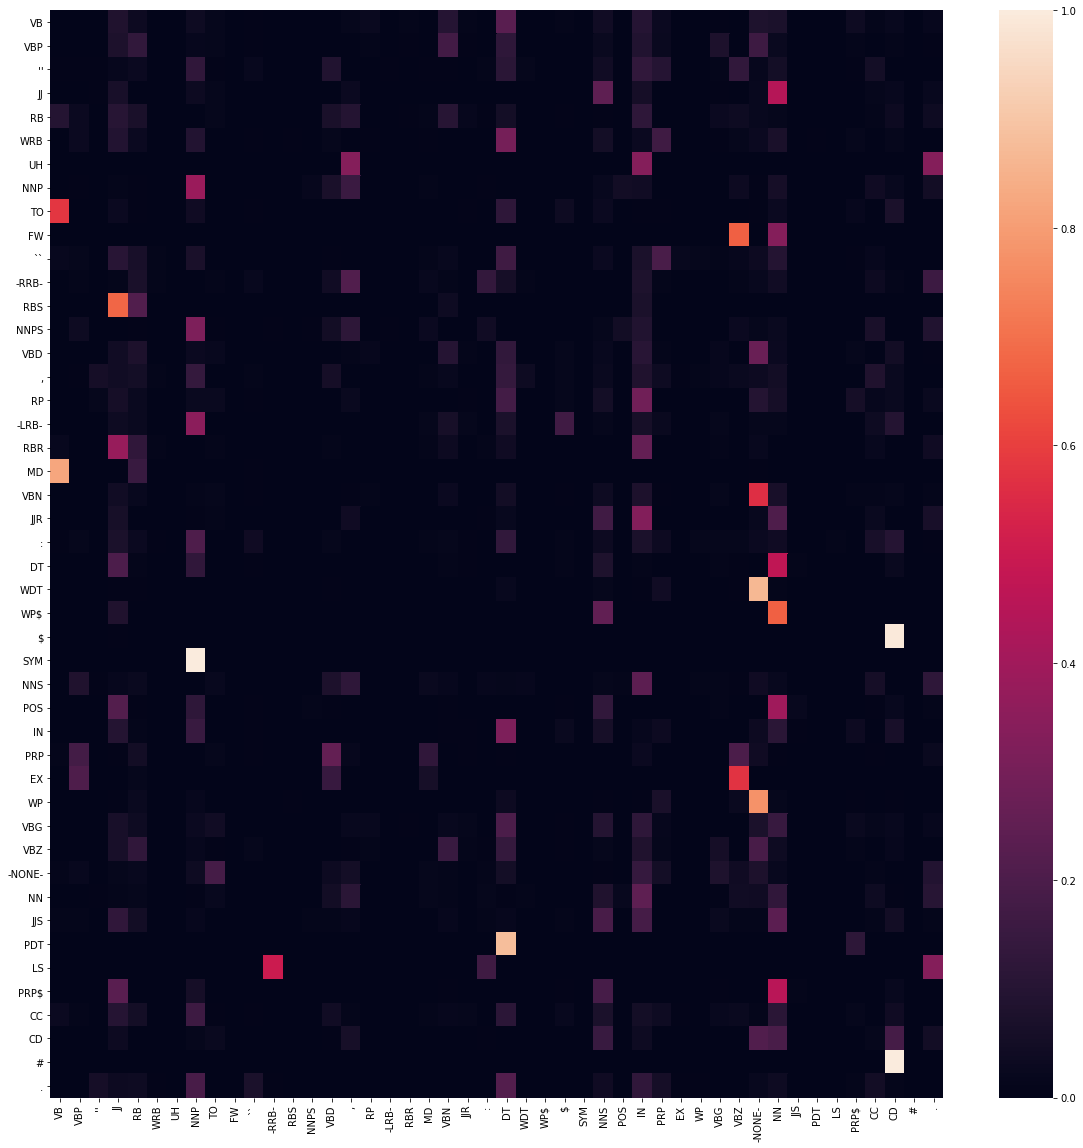

In [140]:
plt.figure(figsize=(20, 20))
sns.heatmap(tags_transistion)
plt.show()

### Test run of hidden markov model 

In [142]:
random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('There', 'EX'),
  ('is', 'VBZ'),
  ('no', 'DT'),
  ('asbestos', 'NN'),
  ('in', 'IN'),
  ('our', 'PRP$'),
  ('products', 'NNS'),
  ('now', 'RB'),
  ('.', '.'),
  ("''", "''")],
 [('As', 'IN'),
  ('a', 'DT'),
  ('part', 'NN'),
  ('of', 'IN'),
  ('overall', 'JJ'),
  ('efforts', 'NNS'),
  ('*', '-NONE-'),
  ('to', 'TO'),
  ('reduce', 'VB'),
  ('spending', 'NN'),
  (',', ','),
  ('Congress', 'NNP'),
  ('cut', 'VBD'),
  ('by', 'IN'),
  ('$', '$'),
  ('30', 'CD'),
  ('million', 'CD'),
  ('*U*', '-NONE-'),
  ('the', 'DT'),
  ('Bush', 'NNP'),
  ('administration', 'NN'),
  ("'s", 'POS'),
  ('request', 'NN'),
  ('for', 'IN'),
  ('antitrust', 'JJ'),
  ('enforcement', 'NN'),
  ('for', 'IN'),
  ('fiscal', 'JJ'),
  ('1990', 'CD'),
  (',', ','),
  ('which', 'WDT'),
  ('*T*-81', '-NONE-'),
  ('began', 'VBD'),
  ('Oct.', 'NNP'),
  ('1', 'CD'),
  ('.', '.')],
 [('``', '``'),
  ('These', 'DT'),
  ('cases', 'NNS'),
  ('lead', 'VBP'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('loss', 'NN'),
  ('of', 'IN'),
  

In [158]:
start = time.time()
obj = HiddenMarkovModel(train_tagged_words, unique_set)
tagged_seq = obj.vetarbi(test_tagged_words, tags_transistion)
end = time.time()
difference = end-start

In [159]:
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  28.867427110671997
[('There', 'EX'), ('is', 'VBZ'), ('no', 'DT'), ('asbestos', 'NN'), ('in', 'IN'), ('our', 'PRP$'), ('products', 'NNS'), ('now', 'RB'), ('.', '.'), ("''", "''"), ('As', 'IN'), ('a', 'DT'), ('part', 'NN'), ('of', 'IN'), ('overall', 'JJ'), ('efforts', 'NNS'), ('*', '-NONE-'), ('to', 'TO'), ('reduce', 'VB'), ('spending', 'NN'), (',', ','), ('Congress', 'NNP'), ('cut', 'VBD'), ('by', 'IN'), ('$', '$'), ('30', 'CD'), ('million', 'CD'), ('*U*', '-NONE-'), ('the', 'DT'), ('Bush', 'NNP'), ('administration', 'NN'), ("'s", 'POS'), ('request', 'NN'), ('for', 'IN'), ('antitrust', 'JJ'), ('enforcement', 'NN'), ('for', 'IN'), ('fiscal', 'JJ'), ('1990', 'CD'), (',', ','), ('which', 'WDT'), ('*T*-81', 'VB'), ('began', 'VB'), ('Oct.', 'NNP'), ('1', 'CD'), ('.', '.'), ('``', '``'), ('These', 'DT'), ('cases', 'NNS'), ('lead', 'VBP'), ('to', 'TO'), ('the', 'DT'), ('loss', 'NN'), ('of', 'IN'), ('the', 'DT'), ('firms', 'NNS'), ("'", 'POS'), ('social', 'JJ'), ('and', 

In [160]:
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
accuracy

0.928

In [161]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases

[[('which', 'WDT'), (('*T*-81', 'VB'), ('*T*-81', '-NONE-'))],
 [('*T*-81', '-NONE-'), (('began', 'VB'), ('began', 'VBD'))],
 [('a', 'DT'), (('ministry', 'VB'), ('ministry', 'NN'))],
 [('10,000', 'CD'), (('yen', 'NN'), ('yen', 'NNS'))],
 [('the', 'DT'), (('Saitama', 'VB'), ('Saitama', 'NNP'))],
 [('Saitama', 'NNP'), (('prefectural', 'VB'), ('prefectural', 'JJ'))],
 [('years', 'NNS'), (('ago', 'IN'), ('ago', 'RB'))],
 [('to', 'TO'), (('plan', 'NN'), ('plan', 'VB'))],
 [('for', 'IN'), (('Wakayama', 'VB'), ('Wakayama', 'NNP'))]]

In [163]:
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = obj.vetarbi(words, tags_transistion)
end = time.time()
difference = end-start
print(difference)
print(tagged_seq)
print(difference)

5.983627080917358
[('Twitter', 'VB'), ('is', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'VB'), ('social', 'JJ'), ('site', 'VB'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'VB'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'VBG'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]
5.983627080917358
